# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [2]:
import pandas as pd

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [25]:
employees = pd.read_csv('C:\\Users\\sarah\\Documents\\IRONHACK\\dataV2-labs-master\\module-2\\Pivot-Table-Correlation\\employees2.csv')

#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [6]:
# Method 1
employees.groupby('Department')['Salary'].mean()

Department
Admin    76.325203
HR       74.237705
IT       70.671642
Sales    73.132231
Name: Salary, dtype: float64

In [8]:
# Method 2
employees.pivot_table(index = ['Department'], values = ['Salary'])

,Salary
Department,
Admin,76.325203
HR,74.237705
IT,70.671642
Sales,73.132231


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [20]:
employees.pivot_table(index = ['Department', 'Title'], values = ['Salary'])

Salary
Department Title               
Admin      Analyst    77.736842
           VP         75.571429
           associate  75.813953
HR         Analyst    71.404762
           VP         75.441176
           associate  75.934783
IT         Analyst    69.600000
           VP         74.000000
           associate  68.095238
Sales      Analyst    76.074074
           VP         66.675000
           associate  76.814815

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [13]:
employees.pivot_table(index = ['Title'], columns = ['Years'], values = ['Salary'])

Salary                                                         \
Years             1          2          3          4          5          6    
Title                                                                         
Analyst    75.000000  63.384615  73.388889  77.600000  77.615385  87.444444   
VP         74.714286  83.200000  69.000000  82.333333  80.000000  61.071429   
associate  77.333333  83.250000  83.562500  73.300000  64.333333  74.454545   

                                                                             \
Years             7          8          9          10         11         12   
Title                                                                         
Analyst    67.000000  78.000000  86.454545  73.666667  71.181818  68.642857   
VP         78.692308  54.181818  65.666667  70.400000  79.363636  76.222222   
associate  70.166667  69.500000  76.090909  73.941176  73.750000  77.700000   

                                            
Years             13         14         15  
Title                                       
Analyst    69.571429  70.000000  71.200000  
VP         87.000000  74.785714  72.272727  
associate  62.222222  62.800000  64.500000

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [21]:
employees.pivot_table(index = ['Department', 'Title'], values = ['Salary'], aggfunc = ('mean', 'count'))

Salary           
                      count       mean
Department Title                      
Admin      Analyst     38.0  77.736842
           VP          42.0  75.571429
           associate   43.0  75.813953
HR         Analyst     42.0  71.404762
           VP          34.0  75.441176
           associate   46.0  75.934783
IT         Analyst     45.0  69.600000
           VP          47.0  74.000000
           associate   42.0  68.095238
Sales      Analyst     54.0  76.074074
           VP          40.0  66.675000
           associate   27.0  76.814815

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [22]:
employees.pivot_table(index=['Department', 'Title'], values = ['Salary'], aggfunc = ('median', 'min', 'max', 'std'))

Salary                        
                        max median   min        std
Department Title                                   
Admin      Analyst    120.0   80.5  33.0  26.335347
           VP         120.0   75.5  31.0  24.927351
           associate  119.0   79.0  30.0  26.524253
HR         Analyst    119.0   72.5  31.0  25.093056
           VP         119.0   76.5  32.0  26.594817
           associate  119.0   76.0  30.0  28.063739
IT         Analyst    119.0   69.0  30.0  28.418464
           VP         120.0   71.0  31.0  25.568323
           associate  117.0   59.5  33.0  28.557866
Sales      Analyst    120.0   72.0  30.0  27.855999
           VP         119.0   60.0  30.0  27.017931
           associate  120.0   79.0  31.0  28.266638

In [ ]:
"""
The min and max salary for each title seems to be independent from the department and title.
But having a look at the median salary, we can see a tendency that on people in the Admin department have better salaries
and those in IT have the lowest.
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [24]:
# no missing value here !
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Department  500 non-null    object
 1   Education   500 non-null    object
 2   Title       500 non-null    object
 3   Name        500 non-null    object
 4   Years       500 non-null    int64 
 5   Salary      500 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 23.6+ KB


#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [26]:
employees.pivot_table(index = ['Department'], values = ['Salary'], aggfunc = ('sum', 'count'))

Salary      
            count   sum
Department             
Admin         123  9388
HR            122  9057
IT            134  9470
Sales         121  8849

#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [28]:
employees.pivot_table(index = ['Department', 'Title'], values = ['Salary', 'Years'], aggfunc = {'Salary': 'mean', 'Years': 'sum'})

Salary  Years
Department Title                      
Admin      Analyst    77.736842    292
           VP         75.571429    342
           associate  75.813953    306
HR         Analyst    71.404762    326
           VP         75.441176    198
           associate  75.934783    351
IT         Analyst    69.600000    346
           VP         74.000000    409
           associate  68.095238    336
Sales      Analyst    76.074074    441
           VP         66.675000    293
           associate  76.814815    138

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here

# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [33]:
fitbit = pd.read_csv('C:\\Users\\sarah\\Documents\\IRONHACK\\dataV2-labs-master\\module-2\\Pivot-Table-Correlation\\Fitbit2.csv')
fitbit.shape

(367, 24)

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [31]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


In [32]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        367 non-null    object 
 1   Calorie burned              367 non-null    int64  
 2   Steps                       367 non-null    int64  
 3   Distance                    367 non-null    float64
 4   Floors                      367 non-null    int64  
 5   Minutes Sedentary           367 non-null    float64
 6   Minutes Lightly Active      367 non-null    int64  
 7   Minutes Fairly Active       367 non-null    int64  
 8   Minutes Very Active         367 non-null    int64  
 9   Activity Calories           367 non-null    int64  
 10  MinutesOfSleep              367 non-null    int64  
 11  MinutesOfBeingAwake         367 non-null    int64  
 12  NumberOfAwakings            367 non-null    int64  
 13  LengthOfRestInMinutes       367 non

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [37]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [38]:
import matplotlib.pyplot as plt;

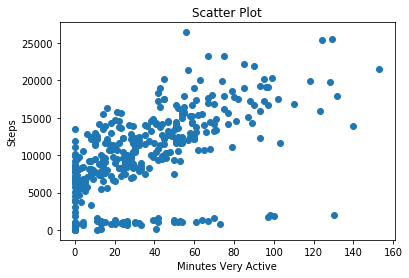

In [39]:
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])
plt.title('Scatter Plot')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
Well the correlation is 0.57 and it shows. The point seems to follow a tendency but the point are still too spead out
that it is hard to really see a correlation with this scatter plot.
Doing some linear regression on this plot would be too much of an approximation.
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [44]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

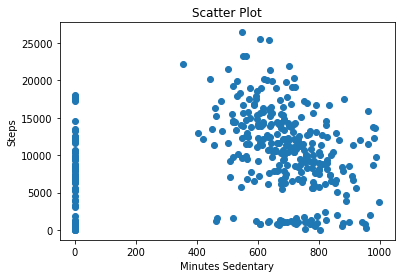

In [43]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title('Scatter Plot')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
The correlation is too close to 0, and the scatter plot shows a cluster of points without any relation.
These two variables are not related.
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [45]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

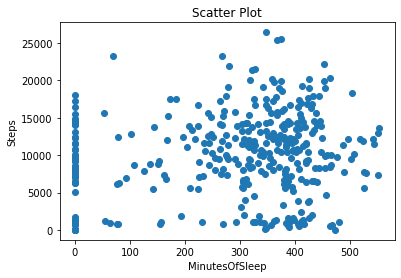

In [46]:
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.title('Scatter Plot')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
Same here, the correlation is too close to zero, and the points don't show any kind of relation between the 
two variables, there is no correlation.
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [47]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [50]:
cor_fit = fitbit[columns]
cor_fit = cor_fit.corr()

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [53]:
cor_fit['Steps'].sort_values(ascending = False)

#There is no high correlation here !

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [ ]:
# your code here

#### Show visually the frequency distribution of the `time_grades` dataset.

In [ ]:
# your code here

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

In [ ]:
# your code here

In [ ]:
"""
your commments here
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""